## 3.3 특성 공학과 규제

목적: 여러 특성을 사용한 다중 회귀에 대해 배우고 사이킷런의 여러 도구를 사용해 봅니다. 복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀를 배웁니다.

### 다중 회귀(Multiple Regresstion)

다중 회귀은 여러 개의 특성을 사용한 선형 회귀 모델이다.<br>

이번 예제는 농어의 길이 뿐만 아니라 농어의 높이와 두께도 함께 사용합니다. <br>

이 예제에서는 이전처럼 3개 특성을 각각 제곱하여 추가한다. 거기다가 각 특성을 서로 곱해서 또 다른 특성을 만들 것이다.<br>
즉, '농어 길이 X 높이'를 새로운 특성으로 만드는 것이다. <br>
이렇게 기존 특성을 사용해 새로운 특성을 뽑아내는 작업을 <strong>특성 공학(Feature Engineering)</strong> 이라고 한다.

#### 데이터 준비

data: https://bit.ly/perch_csv_data

In [2]:
import pandas as pd

df         = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 사이킷런의 변환기

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다. 사이킷런에서는 이런 클래스를 <strong>변환기(transformer)</strong>라고 부른다.<br>

사이킷런의 모델 클래스에 일관된 fit(), score(), predict() 메서드가 있는 것 처럼 변환기 클래스는 모두 fit(), transform() 메서드를 제공한다.

*** note: 앞서 사용한 LinearRegression 같은 사이킷런 모델 클래스는 추정기(estimator) 라고 부른다.

In [7]:
# 변환기는 PolynomialFeatures 를 사용
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

Q) transform 을 하기 전 꼭 fit을 해야 하는가?
>훈련(fit)을 해야 변환(transform)이 가능하다. 사이킷런의 일관된 api 때문에 두 단계로 나뉘어져 있다. <br>
두 메서드를 붙인 fit_transform 메서드도 있다.

PolynomialFeatures 클래스는 기본적으롤 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다. <br>
2와 3을 각기 제곱한 4와 9가 추가되었고, 2와 3을 곱한 6이 추가 되었다. <br>
1은 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수가 있기 때문에 생긴다.<br>

만일, include_bias=False 로 지정하면 1을 없을 것이다.

In [10]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

Q) include_bias=False는 꼭 지정해야하는가?
> include_bias=False로 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시합니다. 하지만 여기에서는 혼돈을 피하기 위해 명시적으로 지정했다.

In [12]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [13]:
"""
  PolynomialFeatures 클래스 9개의 특성이 어떻게 만들어 졌는지 확인하는 아주 좋은 방법을 제시한다.
  => get_feature_names_out()
"""

poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [18]:
test_poly = poly.transform(test_input)

Q) 꼭 훈련세트에 적용했던 변환기로 테스트 세트를 변환해야 하는가?
> PolynomialFeatures 클래스 fit() 메서드에서 만들 특성의 조합을 준비하기만 하고 별도의 통계 값을 구하지 않는다.<br>
따라서 테스트 세트를 따로 변환해도 된다. 하지만 앞에 공부했던 것과 같이 훈련 세트를 기준으로 테스트세트를 변환하는 습관을 들이는 것이 좋다.

### 다중 회기 모델 훈련하기

(강조) 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다.<br>
다만 여러 개의 특성을 사용하여 선형 회귀를 수행할 뿐이다.

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [19]:
print(lr.score(test_poly, test_target))

0.971455991159406


이전에 있던 과대/과소적합 문제가 해결되었고, 정확도도 높아졌다.<br>

만일, 특성을 더 많이 추가하면 어떻게 될까? 3제곱, 4제곱항을 넣으면?<br>

PolynomialFeatures 클래스의 degree 매개변수를 사용하여 필요한 고차한의 최대 차수를 지정할 수 있다.<br>

In [20]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly  = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [21]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999998099


In [22]:
print(lr.score(test_poly, test_target))

-144.40606225090627


특성의 개수를 크게 늘리면 선형 모델은 아주 강력해진다. 훈련세트에 대해 거의 완벽하게 학습할 수 있다.<br>
하지만 이런 모델은 훈련 세트에 너무 과대적합되므로 테스트세트에서는 형편없는 점수를 만든다. <br>

이 문제를 해결하려면 다시 특성을 줄여야 한다. 하지만 이런 상황은 과대접합을 줄이는 또 다른 방법을 학습할 기회다.

### 규제

<strong>규제(regularization)</strong>은 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 득 모델이 훈련 세트에 과대적합되지 않도록 만드는 것이다.<br>

선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.

In [29]:
# 전처리: 정규화  

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled  = ss.transform(test_poly)

In [30]:
print(ss.mean_, ss.scale_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03] [8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.49275

선형 회귀 모델에 규제를 추가한 모델을 <strong>릿지(Ridge)와 라쏘(Lasso)</strong>라고 부른다. <br>

릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, <br>

라쏘는 계수의 절댓값을 기준으로 규제를 적용한다. <br>

일반적으로 릿지를 조금 더 선호한다. 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 도 있다.

### 릿지 회귀

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [32]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


테스트 세트 점수가 정상으로 돌아왔다. 확실히 많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다.<br>

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절한다.<br>

alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소접합되도록 유도한다. alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 커진다.

Q) 사람이 직접 지정해야 하는 매개변수
> alpha 값은 릿지 모델이 학습하는 값이 아니라 사전에 우리가 지정해야하는 값이다. 이렇게 머신런닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 <strong>하이퍼파라미터(hyperparameter)</strong>라고 부른다.

In [35]:
"""

  적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 R^2 값의 그래프를 그려보는 것이다.
  훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다.

"""

import matplotlib.pyplot as plt
train_score = []
test_score  = []

# alpha 0.001~100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 점수를 저장하고 그림 그리기
alpha_list  = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge   = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

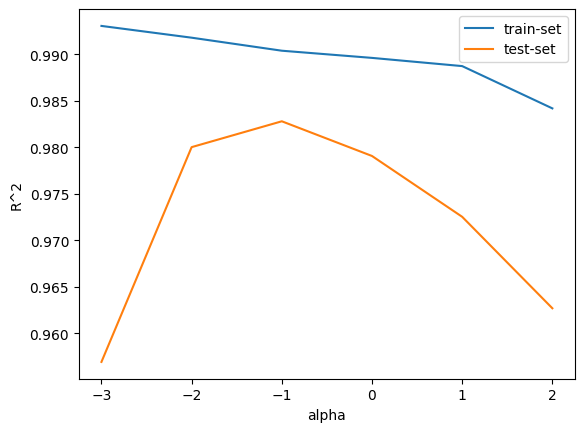

In [37]:
plt.plot(np.log10(alpha_list), train_score, label="train-set")
plt.plot(np.log10(alpha_list), test_score, label="test-set")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.legend()
plt.show()

In [39]:
ridge = Ridge(alpha=0.1)  # 10 ^ -1
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386918


### 라쏘 회귀

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [41]:
lasso.score(test_scaled, test_target)

0.9800593698421884

In [43]:
train_score = []
test_score  = []

# alpha 0.001~100까지 10배씩 늘려가며 라쏘 회귀 모델을 훈련한 다음 점수를 저장하고 그림 그리기
alpha_list  = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso   = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/usr01/.local/share/virtualenvs/hongong-QbFHym6F/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/usr01/.local/share/virtualenvs/hongong-QbFHym6F/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


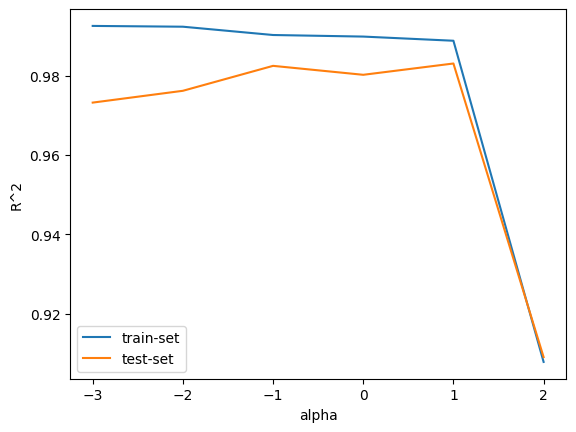

In [44]:
plt.plot(np.log10(alpha_list), train_score, label="train-set")
plt.plot(np.log10(alpha_list), test_score, label="test-set")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.legend()
plt.show()

In [46]:
lasso = Lasso(alpha=10) # 10 ^ 1
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131866
0.9824470598706695


In [47]:
np.sum(lasso.coef_ == 0)

40